<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/BDA(%ED%86%B5%EA%B3%84)/%EC%9D%B4%EA%B0%80%EC%98%81_41_%EC%B5%9C%EC%A2%85%EA%B3%BC%EC%A0%9C_%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석

## 목적1: 홍보 경로 분석 (전공, 유입 시기)
- 부차적으로 다양한 희망 직무와 학회내에서 이루어졌던 설명회 매칭
- 상점 df활용


## 목적2: 재참여율 분석
- 각분기에 참여했떤 반과 8기에 참여를 원하는 반
- 재참여 시 신청률이 가장 높은 반
- 전체에서 가장 인기가 많은 반 1,2 가리기 (초/중급도 분류하기)

## 1. df 및 라이브러리 호출
- 각종 df 호출 및 컬럼명 확인
- point_df = pd.read_excel('8기 학회원 트레인데이터 - 상점.xlsx')
- repar_df = pd.read_excel('8기 학회원 트레인데이터 - 재참여가능성.xlsx')
- satis_df = pd.read_excel('8기 학회원 트레인데이터 - 학회만족도.xlsx')

In [1]:
# xlsx 안열릴경우 실행
!pip install openpyxl==3.1.2
#폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [3]:
point_df = pd.read_excel('8기 학회원 트레인데이터 - 상점.xlsx')
repar_df = pd.read_excel('8기 학회원 트레인데이터 - 재참여가능성.xlsx')
satis_df = pd.read_excel('8기 학회원 트레인데이터 - 학회만족도.xlsx')

In [4]:
point_df.head(3)

,상벌점 총점,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",2-13) 현재 본인의 직업을 알려주세요.,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),3-1) 직업 내용을 작성해주세요.,7-1) 데이터 분석 제외 교육 받고 싶은 직무를 선택해 주세요.,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,2-12) 졸업 후 진로를 선택해주세요.,6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?,...,6-6) BDA 인스타그램을 팔로우 하셨나요?,2-11) 재학생의 경우 2024-1학기에 듣는 학점을 적어주세요. ( 예시 : 18학점 -> 18 ),6-5) BDA에서 진행되는 조별활동에 참여하실 의향이 있으신가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요).1","7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?",8-1) 참여 경험이 있는 항목에 모두 선택해주세요.,"9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?",11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?,13-1) 구독중인 뉴스레터가 있나요?,14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)
0,-8.0,4~5,대학교 이수학기 4학기 이하,공학 (컴퓨터 공학 제외),NaN,개발,데이터 엔지니어,그렇다,취업,프로젝트 경험,...,아니요,NaN,네. 오프라인으로 참여하고 싶어요,4~5,없음,NaN,없음,없음,아니요,NaN
1,NaN,1,대학교 이수학기 4학기 이하,의약학,NaN,개발,인공지능 전문가,그렇다,대학원 진학,데이터 분석 역량,...,예,24,네. 온라인으로 참여하고 싶어요,1,없음,NaN,없음,없음,아니요,NaN
2,-77.0,2,대학교 이수학기 5학기 이상,IT (컴퓨터 공학 포함),NaN,AI,인공지능 전문가,그렇다,취업,프로젝트 경험,...,예,18,네. 오프라인으로 참여하고 싶어요,2,없음,NaN,없음,없음,아니요,NaN


In [5]:
point_df.columns

Index(['상벌점 총점',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       '2-13) 현재 본인의 직업을 알려주세요.',
       '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )', '3-1) 직업 내용을 작성해주세요.',
       '7-1) 데이터 분석 제외 교육 받고 싶은 직무를 선택해 주세요.',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?', '2-12) 졸업 후 진로를 선택해주세요.',
       '6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?', '유입 경로를 알려주세요.',
       '6-6) BDA 인스타그램을 팔로우 하셨나요?',
       '2-11) 재학생의 경우 2024-1학기에 듣는 학점을 적어주세요. ( 예시 : 18학점 -> 18 )',
       '6-5) BDA에서 진행되는 조별활동에 참여하실 의향이 있으신가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요).1',
       '7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?',
       '8-1) 참여 경험이 있는 항목에 모두 선택해주세요.', '9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?',
       '  11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?  ', '13-1) 구독중인 뉴스레터가 있나요?  ',
       '14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)  '],
      dtype='object')

In [6]:
repar_df.head(3)

,7기 참여 여부,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),2-9) 본인의 (최종) 학과명을 적어주세요. ( 예시 : OO학과 ),2-10) 본인의 복수전공명을 적어주세요. ( 예시 : OO학과 ),2-12) 졸업 후 진로를 선택해주세요.,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?,"7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?",8-1) 참여 경험이 있는 항목에 모두 선택해주세요.,"9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?",11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?,13-1) 구독중인 뉴스레터가 있나요?,14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)
0,0,공학 (컴퓨터 공학 제외),신소재공학과,NaN,취업,데이터 엔지니어,그렇다,4~5,NaN,없음,NaN,없음,없음,아니요,NaN
1,0,의약학,의예과,NaN,대학원 진학,인공지능 전문가,그렇다,1,NaN,없음,NaN,없음,없음,아니요,NaN
2,0,IT (컴퓨터 공학 포함),IT공학고ㅓ,빅데이터학과,취업,인공지능 전문가,그렇다,2,NaN,없음,NaN,없음,없음,아니요,NaN


In [7]:
repar_df.columns

Index(['7기 참여 여부', '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )',
       '2-9) 본인의 (최종) 학과명을 적어주세요. (  예시 :  OO학과 )',
       '2-10) 본인의 복수전공명을 적어주세요. (  예시 :  OO학과 )', '2-12) 졸업 후 진로를 선택해주세요.',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       'BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?',
       '7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?',
       '8-1) 참여 경험이 있는 항목에 모두 선택해주세요.', '9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?',
       '  11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?  ', '13-1) 구독중인 뉴스레터가 있나요?  ',
       '14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)  '],
      dtype='object')

In [8]:
satis_df.head(3)

,1-1) BDA 학회에 참여하신 적이 있으십니까?,1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [3기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [4기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [5기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [6기],1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [7기],1-4) 8기에 참여를 원하는 분반 번호를 선택해주세요.,1-4) 8기에 참여를 원하는 첫 번째 분반 번호를 선택해주세요.,1-5) 8기에 참여를 원하는 두 번째 분반 번호를 선택해주세요.,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),...,2-12) 졸업 후 진로를 선택해주세요.,2-13) 현재 본인의 직업을 알려주세요.,3-1) 직업 내용을 작성해주세요.,유입 경로를 알려주세요.,5-2) 추천인의 참여 기수와 분반을 적어주세요,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?
0,아니요,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,공학 (컴퓨터 공학 제외),...,취업,대학교 이수학기 4학기 이하,NaN,에브리타임,NaN,데이터 엔지니어,그렇다,프로젝트 경험,4~5,NaN
1,아니요,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1.0,의약학,...,대학원 진학,대학교 이수학기 4학기 이하,NaN,에브리타임,NaN,인공지능 전문가,그렇다,데이터 분석 역량,1,NaN
2,아니요,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,IT (컴퓨터 공학 포함),...,취업,대학교 이수학기 5학기 이상,NaN,에브리타임,NaN,인공지능 전문가,그렇다,프로젝트 경험,2,NaN


In [9]:
satis_df.columns

Index(['1-1) BDA 학회에 참여하신 적이 있으십니까?',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [3기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [4기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [5기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [6기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [7기]',
       '1-4) 8기에 참여를 원하는 분반 번호를 선택해주세요.',
       '1-4) 8기에 참여를 원하는 첫 번째 분반 번호를 선택해주세요.',
       '1-5) 8기에 참여를 원하는 두 번째 분반 번호를 선택해주세요.',
       '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )',
       '2-9) 본인의 (최종) 학과명을 적어주세요. (  예시 :  OO학과 )',
       '2-10) 본인의 복수전공명을 적어주세요. (  예시 :  OO학과 )', '2-12) 졸업 후 진로를 선택해주세요.',
       '2-13) 현재 본인의 직업을 알려주세요.', '3-1) 직업 내용을 작성해주세요.', '유입 경로를 알려주세요.',
       '5-2) 추천인의 참여 기수와 분반을 적어주세요 ',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?', '6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       'BDA를 친구/지인 등 주변에 얼마나

# 2. 유입경로 및 홍보 관련 분석

In [10]:
point_df

,상벌점 총점,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)",2-13) 현재 본인의 직업을 알려주세요.,2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 ),3-1) 직업 내용을 작성해주세요.,7-1) 데이터 분석 제외 교육 받고 싶은 직무를 선택해 주세요.,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)",6-10) 희망 직무에 데이터 역량이 필요한가요?,2-12) 졸업 후 진로를 선택해주세요.,6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?,...,6-6) BDA 인스타그램을 팔로우 하셨나요?,2-11) 재학생의 경우 2024-1학기에 듣는 학점을 적어주세요. ( 예시 : 18학점 -> 18 ),6-5) BDA에서 진행되는 조별활동에 참여하실 의향이 있으신가요?,"6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요).1","7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?",8-1) 참여 경험이 있는 항목에 모두 선택해주세요.,"9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?",11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?,13-1) 구독중인 뉴스레터가 있나요?,14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)
0,-8.0,4~5,대학교 이수학기 4학기 이하,공학 (컴퓨터 공학 제외),NaN,개발,데이터 엔지니어,그렇다,취업,프로젝트 경험,...,아니요,NaN,네. 오프라인으로 참여하고 싶어요,4~5,없음,NaN,없음,없음,아니요,NaN
1,NaN,1,대학교 이수학기 4학기 이하,의약학,NaN,개발,인공지능 전문가,그렇다,대학원 진학,데이터 분석 역량,...,예,24,네. 온라인으로 참여하고 싶어요,1,없음,NaN,없음,없음,아니요,NaN
2,-77.0,2,대학교 이수학기 5학기 이상,IT (컴퓨터 공학 포함),NaN,AI,인공지능 전문가,그렇다,취업,프로젝트 경험,...,예,18,네. 오프라인으로 참여하고 싶어요,2,없음,NaN,없음,없음,아니요,NaN
3,-17.0,3,대학교 이수학기 4학기 이하,IT (컴퓨터 공학 포함),NaN,AI,데이터 분석가,매우 그렇다,취업,데이터 분석 역량,...,예,18,네. 오프라인으로 참여하고 싶어요,3,없음,NaN,있음,없음,아니요,NaN
4,NaN,2,대학교 이수학기 4학기 이하,IT (컴퓨터 공학 포함),NaN,AI,PM/서비스 기획자,그렇다,고민중,데이터 분석 역량,...,아니요,18,네. 온라인으로 참여하고 싶어요,2,없음,NaN,있음,없음,예,"트렌드/라이프, 경제/재테크"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-18.0,3,대학교 이수학기 5학기 이상,"경영학, 사회과학",NaN,AI,데이터저널리스트,매우 그렇다,취업,데이터 분석 역량,...,예,18,네. 오프라인으로 참여하고 싶어요,3,없음,NaN,없음,없음,예,"트렌드/라이프, 경제/재테크, 시사/사회, 문화/예술"
1232,NaN,7,대학교 이수학기 5학기 이상,사회과학,NaN,개발,데이터 사이언티스트,매우 그렇다,취업,데이터 분석 역량,...,예,3,네. 온라인으로 참여하고 싶어요,7,없음,NaN,없음,없음,아니요,NaN
1233,-12.0,2시간,대학교 이수학기 4학기 이하,"경영학, 사회과학",NaN,"마케팅, 광고, MD",마케터,그렇다,취업,공모전 경험,...,아니요,18,네. 오프라인으로 참여하고 싶어요,2시간,있음,"스터디, 학회 (BDA 제외)",있음,없음,아니요,NaN
1234,-82.0,1,대학교 이수학기 5학기 이상,IT (컴퓨터 공학 포함),NaN,AI,인공지능 전문가,매우 그렇다,대학원 진학,공모전 경험,...,예,19,네. 온라인으로 참여하고 싶어요,1,없음,NaN,없음,없음,아니요,NaN


In [11]:
# 상점 df의 유입경로 컬럼명 쉽게바꾸기
point_df = point_df.rename(columns={'유입 경로를 알려주세요.': '유입경로'})
point_df['유입경로'].unique()

array(['에브리타임', '기존 BDA 오픈채팅방', '인스타그램', '링커리어', '캠퍼즈', '지인 추천',
       '지인추천 ( 기존 회원x)', '인턴 동료 추천', '교내 플랫폼 (에브리타임 x)', '친구권유', '인터넷 서치',
       '인터넷 검색', '스펙업 카페', '잡페스티벌', '캠퍼스픽', '지인 추천(참여한적 없는)', '블로그',
       'Bda 오픈채팅방/회비입금내역에서 제가 쓰는 뱅킹앱은 입금자명이 보이지 않습니다.', '구글 검색', '네이버카페',
       '검색', '네이버 검색 (블로그)', '인터넷 서칭', '소개', '데이터 학회 검색', '이전 기수 활동',
       '교내학회', nan], dtype=object)

In [12]:
enter_path = point_df['유입경로'].value_counts()
most_frequent = enter_path.head(10)  # 가장 빈도가 높은 값과 그 빈도수를 Series 형태로 출력
print(most_frequent)

유입경로
에브리타임               835
기존 BDA 오픈채팅방        147
인스타그램               142
링커리어                 40
지인 추천                40
교내 플랫폼 (에브리타임 x)      6
캠퍼즈                   3
검색                    2
잡페스티벌                 2
친구권유                  1
Name: count, dtype: int64


- 전반적으로 에브리타임의 유입이 높음
- 외의 유입경로 지인추천, 링커리어 등 스펙관련 채널이 높음을 알 수 있음
- 6위는 에타외의 교내플랫폼

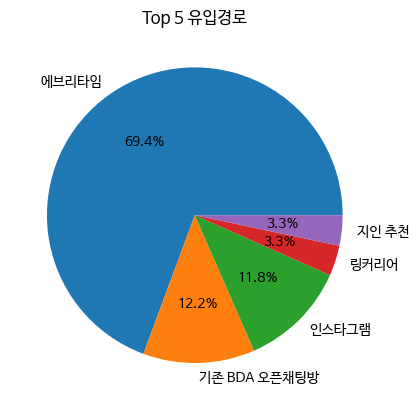

In [13]:
enter_path = point_df['유입경로'].value_counts()
top5_enter_path = enter_path.head(5)  # 가장 빈도가 높은 5개만 선택

# 유입경로 파이차트 그리기
plt.pie(top5_enter_path, labels=top5_enter_path.index, autopct='%1.1f%%')
plt.title('Top 5 유입경로')
plt.show()

# 3. 직업, 전공 및 대학 재학현황 분석
- 에브리타임 유입률이 높은 만큼 대학 수강자들의 상황 세부분석
- 재참여 df의 공부투입시간, 추천도
- 만족도의 첫번째, 두번째 인기분반
- point_df의 '2-13) 현재 본인의 직업을 알려주세요.', 시각화 (학기별 구체화)

In [14]:
repar_df.columns

Index(['7기 참여 여부', '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )',
       '2-9) 본인의 (최종) 학과명을 적어주세요. (  예시 :  OO학과 )',
       '2-10) 본인의 복수전공명을 적어주세요. (  예시 :  OO학과 )', '2-12) 졸업 후 진로를 선택해주세요.',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       'BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?',
       '7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?',
       '8-1) 참여 경험이 있는 항목에 모두 선택해주세요.', '9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?',
       '  11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?  ', '13-1) 구독중인 뉴스레터가 있나요?  ',
       '14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)  '],
      dtype='object')

In [15]:
satis_df.columns

Index(['1-1) BDA 학회에 참여하신 적이 있으십니까?',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [3기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [4기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [5기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [6기]',
       '1-2) 이전에 참여했던 기수와 분반을 모두 선택해주세요. (복수선택 가능) [7기]',
       '1-4) 8기에 참여를 원하는 분반 번호를 선택해주세요.',
       '1-4) 8기에 참여를 원하는 첫 번째 분반 번호를 선택해주세요.',
       '1-5) 8기에 참여를 원하는 두 번째 분반 번호를 선택해주세요.',
       '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )',
       '2-9) 본인의 (최종) 학과명을 적어주세요. (  예시 :  OO학과 )',
       '2-10) 본인의 복수전공명을 적어주세요. (  예시 :  OO학과 )', '2-12) 졸업 후 진로를 선택해주세요.',
       '2-13) 현재 본인의 직업을 알려주세요.', '3-1) 직업 내용을 작성해주세요.', '유입 경로를 알려주세요.',
       '5-2) 추천인의 참여 기수와 분반을 적어주세요 ',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?', '6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       'BDA를 친구/지인 등 주변에 얼마나

In [16]:
point_df.columns

Index(['상벌점 총점',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요)',
       '2-13) 현재 본인의 직업을 알려주세요.',
       '2-7) 본인의 (최종) 전공 대학 구분을 선택해주세요. ( 복수선택 가능 )', '3-1) 직업 내용을 작성해주세요.',
       '7-1) 데이터 분석 제외 교육 받고 싶은 직무를 선택해 주세요.',
       '6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)',
       '6-10) 희망 직무에 데이터 역량이 필요한가요?', '2-12) 졸업 후 진로를 선택해주세요.',
       '6-11) BDA 학회에서 가장 얻고자 하는 1가지는 무엇인가요?', '유입경로',
       '6-6) BDA 인스타그램을 팔로우 하셨나요?',
       '2-11) 재학생의 경우 2024-1학기에 듣는 학점을 적어주세요. ( 예시 : 18학점 -> 18 )',
       '6-5) BDA에서 진행되는 조별활동에 참여하실 의향이 있으신가요?',
       '6-7) 본인이 현재 학업 외 데이터 분석 공부에 투입 가능한 하루 최대 시간은 몇 시간인가요? (2시간인 경우, 2로 적어주세요).1',
       '7-11) 데이터 관련 스터디, 동아리, 학회 참여 경험이 있으신가요?',
       '8-1) 참여 경험이 있는 항목에 모두 선택해주세요.', '9-1) 데이터 활용 공모전, 프로젝트 참여 경험이 있으신가요?',
       '  11-1) 데이터 관련 직무 경험(인턴 등)이 있으신가요?  ', '13-1) 구독중인 뉴스레터가 있나요?  ',
       '14-2) 어떤 분야의 뉴스레터를 구독하고 있나요? (중복 가능)  '],
      dtype='object')

### 1. 직업 비율 시각화

In [16]:
point_df['2-13) 현재 본인의 직업을 알려주세요.'].head(3)

,2-13) 현재 본인의 직업을 알려주세요.
0,대학교 이수학기 4학기 이하
1,대학교 이수학기 4학기 이하
2,대학교 이수학기 5학기 이상


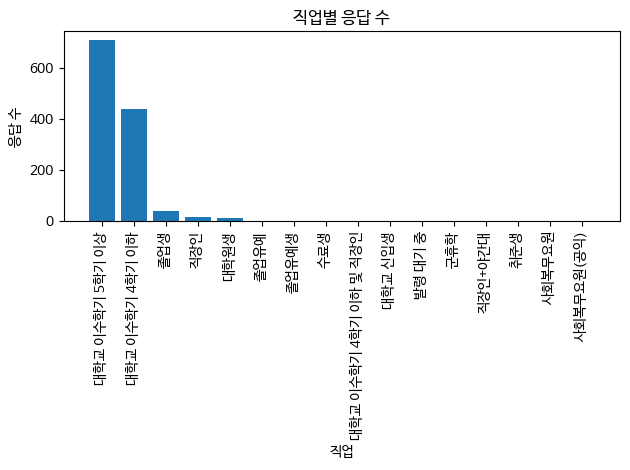

In [18]:
# 값을 세고 정렬
job_counts = point_df['2-13) 현재 본인의 직업을 알려주세요.'].value_counts().sort_values(ascending=False)

# 막대 그래프 생성
plt.bar(job_counts.index, job_counts.values)
plt.xlabel('직업')
plt.ylabel('응답 수')
plt.title('직업별 응답 수')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.tight_layout()  # 레이블이 겹치지 않도록 조정
plt.show()

### 2. 희망직무

In [21]:
point_df['6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)'].head(3)

,"6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)"
0,데이터 엔지니어
1,인공지능 전문가
2,인공지능 전문가


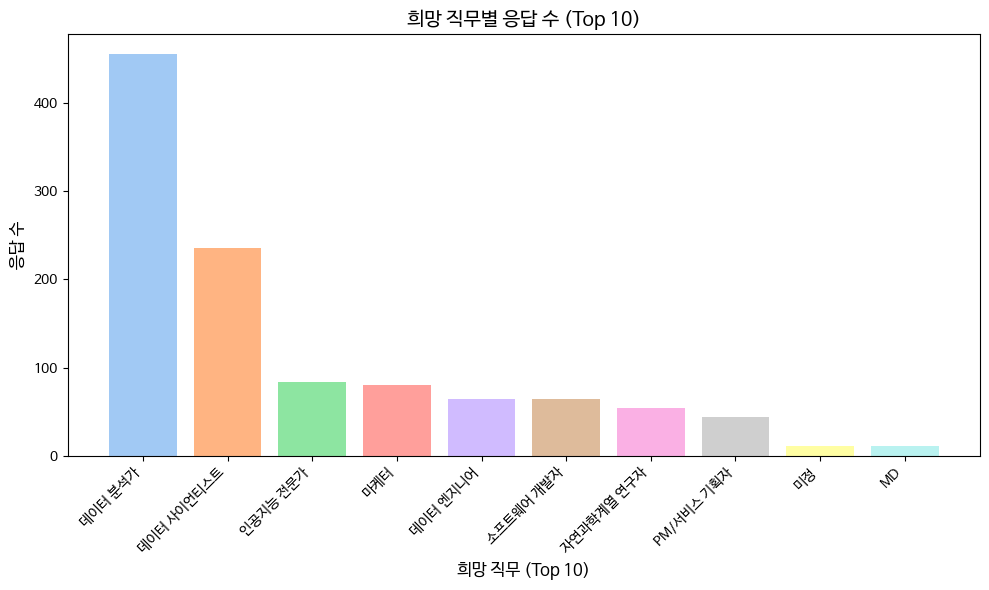

In [25]:
# 값을 세고 정렬 후 상위 10개 선택
hope_counts = point_df['6-9) 희망 직무를 선택해주세요. (마케터, 개발자, 데이터 분석가 등)'].value_counts().nlargest(10)

# 색상 팔레트 설정
colors = sns.color_palette('pastel', len(hope_counts))

# 막대 그래프 생성
plt.figure(figsize=(10, 6))  # 그래프 크기 조정
plt.bar(hope_counts.index, hope_counts.values, color=colors)
plt.xlabel('희망 직무 (Top 10)', fontsize=12)
plt.ylabel('응답 수', fontsize=12)
plt.title('희망 직무별 응답 수 (Top 10)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # x축 레이블 회전 및 글꼴 크기 조정
plt.tight_layout()
plt.show()

In [28]:
repar_df['BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?'].head()
# 비디에이 추천 점수는 7.4
repar_df['BDA를 친구/지인 등 주변에 얼마나 추천하고 싶으신가요?'].mean()

7.4431137724550895